In [1]:
import pandas as pd
import numpy as np

#Read file
bot_data = pd.read_csv('activity_botscore.csv')
bot_data

,user_id,age,count,activity,bot_score_english
0,13616,4256,23279,5.469690,0.020441
1,614513,4124,525,0.127304,0.073133
2,5565,4313,8146,1.888709,0.041325
3,19783,4226,3510,0.830573,0.014311
4,2631,4351,8146,1.872213,0.058340
...,...,...,...,...,...
11185,4915142355,3077,20290,6.594085,0.530100
11186,4918929727,3077,26841,8.723107,0.010001
11187,4920512909,3077,44037,14.311667,0.025888
11188,4910272047,3077,5780,1.878453,0.058340


In [5]:
bot_data.head()

,user_id,age,count,activity,bot_score_english
0,13616,4256,23279,5.469690,0.020441
1,614513,4124,525,0.127304,0.073133
2,5565,4313,8146,1.888709,0.041325
3,19783,4226,3510,0.830573,0.014311
4,2631,4351,8146,1.872213,0.058340


In [6]:
#Input & output data
X = bot_data.drop(columns=['activity'])
X

,user_id,age,count,bot_score_english
0,13616,4256,23279,0.020441
1,614513,4124,525,0.073133
2,5565,4313,8146,0.041325
3,19783,4226,3510,0.014311
4,2631,4351,8146,0.058340
...,...,...,...,...
11185,4915142355,3077,20290,0.530100
11186,4918929727,3077,26841,0.010001
11187,4920512909,3077,44037,0.025888
11188,4910272047,3077,5780,0.058340


In [7]:
y = bot_data['activity']
y

0         5.469690
1         0.127304
2         1.888709
3         0.830573
4         1.872213
           ...    
11185     6.594085
11186     8.723107
11187    14.311667
11188     1.878453
11189     8.103997
Name: activity, Length: 11190, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
#Train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((2238, 4), (2238,))

In [9]:
from sklearn.linear_model import LinearRegression
#Build, fit & evaluate model
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

array([16.06525773, 11.78853659,  4.29107323, ...,  4.07580763,
        1.41509593,  2.0781392 ])

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
intercept = model.intercept_
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Intercept: ", intercept)

Mean Squared Error:  11.407692247471992
Mean Absolute Error:  1.3644377044605611
Intercept:  16.16106023638988


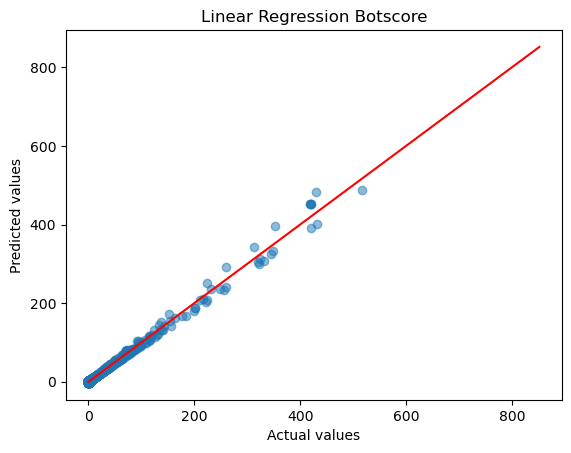

In [12]:
import matplotlib.pyplot as plt
#Visualize results
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression Botscore')
plt.show()

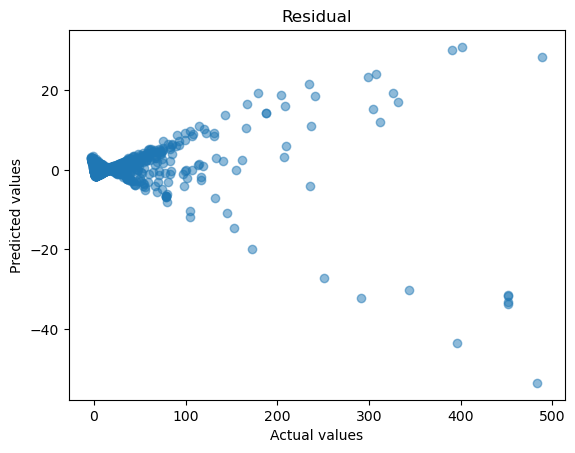

In [13]:
#Visualise Residual(Loss)
plt.scatter(predictions, y_test - predictions, alpha=0.5)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Residual')
plt.show()